# Knowledge graph

## Preliminary operations

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import time
import random
import matplotlib.pyplot as plt
import pickle

## Exploration 

In [2]:
kg = pd.read_csv('C:\\Users\\Simone\\Documents\\Desktop\\Tesi_Magistrale\\Data\\semmedVER43_2023_R_PREDICATION.csv.gz', encoding='ISO-8859-1', header=None, usecols=[3, 5, 9, 10]) #nrows=1000000

In [3]:
kg = kg[[3, 5, 9,10]]
nuovi_nomi_colonne = ["PREDICATE", "SUBJECT_NAME", "OBJECT_NAME","OBJECT_SEMTYPE"]  # Sostituisci con i nuovi nomi delle colonne
kg.columns = nuovi_nomi_colonne
kg

,PREDICATE,SUBJECT_NAME,OBJECT_NAME,OBJECT_SEMTYPE
0,PROCESS_OF,Arboviruses,Lepus capensis,mamm
1,ISA,Tahyna virus,California Group Viruses,virs
2,ISA,Eyach virus,Coltivirus,virs
3,ISA,California Group Viruses,Arboviruses,virs
4,PROCESS_OF,Disease,Human,humn
...,...,...,...,...
126268040,LOCATION_OF,Plasma,prolactin,aapp
126268041,PROCESS_OF,Psychotic symptom,Male population group,humn
126268042,PROCESS_OF,"Memory, Short-Term",Patients,humn
126268043,PROCESS_OF,Sustained attention,Patients,humn


In [4]:
print(f"Predicato: {len(kg['PREDICATE'].unique())}")
print(f"Soggetto: {len(kg['SUBJECT_NAME'].unique())}")
print(f"Oggetto: {len(kg['OBJECT_NAME'].unique())}")

Predicato: 68
Soggetto: 364169
Oggetto: 315421


## Build Graph

In [5]:
# Creazione del grafo
G = nx.Graph()

# Iterazione attraverso le righe del dataframe e aggiunta dei nodi e degli edge al grafo
start_time = time.time()

for _, row in kg.iterrows():
    subject_name = row['SUBJECT_NAME']
    object_name = row['OBJECT_NAME']
    predicate = row['PREDICATE']

    # Aggiungi i nodi se non esistono
    if not G.has_node(subject_name):
        G.add_node(subject_name)

    if not G.has_node(object_name):
        G.add_node(object_name)

    # Aggiungi l'edge
    G.add_edge(subject_name, object_name, label=predicate)

end_time = time.time()

# Calcolo del tempo di esecuzione
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")


Tempo di esecuzione: 9098.17007136345 secondi


In [6]:
# Number of edges
print(G.number_of_edges())
print(len(G.nodes))

19181195
410821


Tempo di esecuzione: 9805.861858606339 secondi

C:\Users\Simone\AppData\Local\Temp\ipykernel_9644\113861258.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_of_interest = random.sample(G.nodes(), min(1000, len(G)))


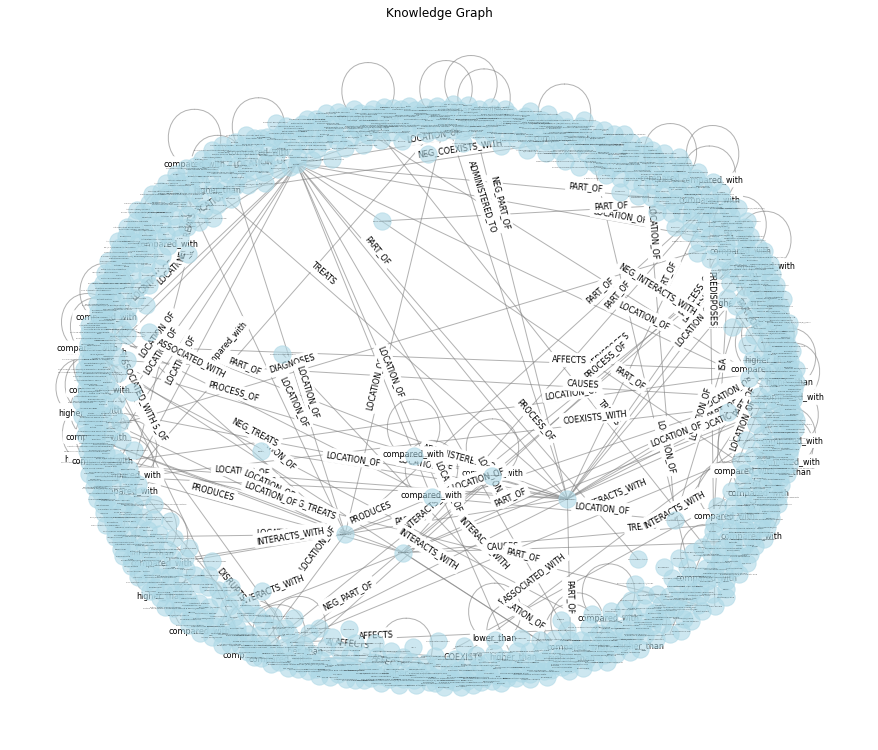

Tempo di esecuzione: -0.6647694110870361 secondi


In [7]:
start_time = time.time()

# Visualize the knowledge graph

# Creiamo un subgraph per la visualizzazione con massimo 200 nodi
nodes_of_interest = random.sample(G.nodes(), min(1000, len(G)))
subgraph = G.subgraph(nodes_of_interest)
pos = nx.spring_layout(subgraph, seed=42, k=0.9)
labels = nx.get_edge_attributes(subgraph, 'label')
plt.figure(figsize=(12, 10))
nx.draw(subgraph, pos, with_labels=True, font_size=2, node_size=300, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

In [8]:
# save graph object to file
#pickle.dump(G, open('KG.pickle', 'wb'))

# load graph object from file
#G = pickle.load(open('graphnx.pickle', 'rb'))